### CTGAN

In [18]:
from tab_forge.models import CTGANSynthesizer

In [19]:
model = CTGANSynthesizer(epochs=100)

In [20]:
model.get_hyperparameters()

{'epochs': 100,
 'discriminator_lr': 0.0002,
 'generator_lr': 0.0002,
 'batch_size': 500,
 'embedding_dim': 128,
 'generator_dim': [256, 256],
 'discriminator_dim': [256, 256],
 'generator_decay': 1e-06,
 'discriminator_decay': 1e-06,
 'discriminator_steps': 1,
 'log_frequency': True,
 'pac': 10,
 'verbose': False}

In [4]:
from sklearn.datasets import make_regression
import pandas as pd

X, y = make_regression(n_samples=1000, n_features=5, n_informative=3, noise=0.1, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(5)])
df['target'] = y
print(df.head())


   feature_0  feature_1  feature_2  feature_3  feature_4     target
0  -0.735201   1.798725  -1.095519   1.656208  -0.880754  47.887298
1  -1.613561  -1.371901  -0.172946   1.471170   1.711708 -33.542467
2   0.651391   0.954002   0.570891  -0.315269   1.135566  75.040627
3  -1.350556  -0.687014  -0.475795  -0.075871  -0.826112 -55.337505
4   1.554160   0.342338  -0.530971   0.853976  -0.335138   0.470015


In [9]:
model.fit(df)

c:\Users\user\miniforge3\envs\nir_venv_py3_11\Lib\site-packages\sdv\single_table\base.py:168: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Users\user\miniforge3\envs\nir_venv_py3_11\Lib\site-packages\sdv\single_table\base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
c:\Users\user\miniforge3\envs\nir_venv_py3_11\Lib\site-packages\ctgan\synthesizers\_utils.py:16: FutureWarning: `cuda` parameter is deprecated and will be removed in a future release. Please use `enable_gpu` instead.
  warnings.warn(
c:\Users\user\miniforge3\envs\nir_venv_py3_11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
model.generate(10)

,feature_0,feature_1,feature_2,feature_3,feature_4,target
0,-0.678977,1.346646,-0.191001,0.034740,1.198538,158.233156
1,-1.879191,1.241912,0.291331,-1.010419,1.247936,38.210430
2,-0.866404,-0.088452,-0.163597,-0.964602,-1.365569,15.156002
3,-1.839962,1.185108,-0.357222,0.135576,0.811072,6.788113
4,1.620928,-2.342007,-2.183945,-1.039332,1.116725,-4.400497
5,-1.926030,-0.025193,0.211646,0.926100,2.242454,96.585901
6,-0.394422,0.823213,1.432676,1.446217,-0.883518,-0.883436
7,1.775193,2.687540,-2.333186,-0.290123,0.176500,-22.632694
8,-0.959855,1.229097,-3.074727,0.593453,-1.316358,-2.631521
9,-2.486732,-0.087227,-2.451789,-1.200223,2.684147,-71.567584


In [13]:
df_losses = model.get_losses()

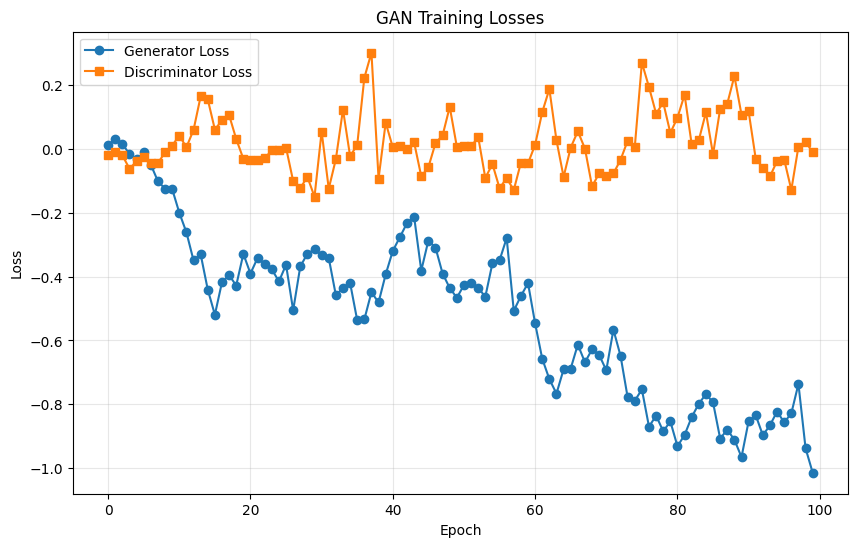

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Предполагаем df уже существует с колонками 'Epoch', 'Generator Loss', 'Discriminator Loss'
plt.figure(figsize=(10, 6))
plt.plot(df_losses['Epoch'], df_losses['Generator Loss'], label='Generator Loss', marker='o')
plt.plot(df_losses['Epoch'], df_losses['Discriminator Loss'], label='Discriminator Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GAN Training Losses')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### WGAN-GP

In [9]:
from tab_forge.models import WGANSynthesizer

In [10]:
model = WGANSynthesizer(epochs=100)

In [11]:
model.get_hyperparameters()

{'epochs': 100,
 'generator_dim': (256, 256),
 'discriminator_dim': (256, 256),
 'embedding_dim': 64,
 'discriminator_lr': 0.0001,
 'generator_lr': 0.0001,
 'batch_size': 64,
 'gp_weight': 1.0,
 'critic_iterations': 3}

In [12]:
from sklearn.datasets import make_regression
import pandas as pd

X, y = make_regression(n_samples=1000, n_features=5, n_informative=3, noise=0.1, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(5)])
df['target'] = y
print(df.head())


   feature_0  feature_1  feature_2  feature_3  feature_4     target
0  -0.735201   1.798725  -1.095519   1.656208  -0.880754  47.887298
1  -1.613561  -1.371901  -0.172946   1.471170   1.711708 -33.542467
2   0.651391   0.954002   0.570891  -0.315269   1.135566  75.040627
3  -1.350556  -0.687014  -0.475795  -0.075871  -0.826112 -55.337505
4   1.554160   0.342338  -0.530971   0.853976  -0.335138   0.470015


In [13]:
model.fit(df, target_column='target')

c:\Users\user\miniforge3\envs\nir_venv_py3_11\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
model.generate(10)

,feature_0,feature_1,feature_2,feature_3,feature_4,target
0,-0.877881,0.605995,-0.944518,1.348550,-1.085917,-14.564910
1,0.963118,0.096998,0.856035,0.108431,0.005590,-0.715068
2,-0.108887,-0.029688,-1.581098,1.586409,-0.076736,-25.918688
3,0.235597,-0.227839,0.312757,1.226476,0.436476,-10.707500
4,3.137213,-1.513892,-2.592783,4.309473,-0.097079,-49.498871
5,3.189167,-1.236290,-0.223859,2.621351,0.051793,-51.183331
6,0.487289,-0.029609,-1.854046,4.833654,-2.750965,-75.176376
7,0.384936,-0.777922,-0.094091,2.055139,-1.075574,-29.126875
8,0.222899,-0.796970,0.351319,3.554646,-4.156856,-59.129543
9,0.371794,1.559795,0.593100,2.016621,-0.210146,-10.344036


In [15]:
df_losses = model.get_losses()

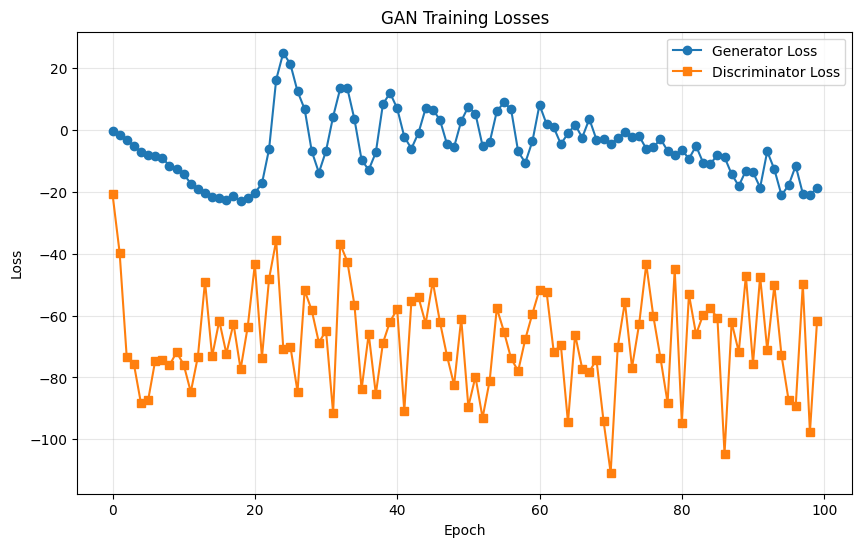

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Предполагаем df уже существует с колонками 'Epoch', 'Generator Loss', 'Discriminator Loss'
plt.figure(figsize=(10, 6))
plt.plot(df_losses['Epoch'], df_losses['Generator Loss'], label='Generator Loss', marker='o')
plt.plot(df_losses['Epoch'], df_losses['Discriminator Loss'], label='Discriminator Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GAN Training Losses')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### GAN-MFS

In [9]:
from tab_forge.models import GANMFSSynthesizer

In [10]:
model = GANMFSSynthesizer(epochs=100)

In [11]:
model.get_hyperparameters()

{'epochs': 100,
 'generator_dim': (256, 256),
 'discriminator_dim': (256, 256),
 'embedding_dim': 64,
 'discriminator_lr': 0.0001,
 'generator_lr': 0.0001,
 'batch_size': 64,
 'gp_weight': 1.0,
 'critic_iterations': 3,
 'mfs_lambda': 0.5,
 'subset_mfs': ['mean', 'var'],
 'sample_number': 3,
 'sample_frac': 0.3}

In [12]:
from sklearn.datasets import make_regression
import pandas as pd

X, y = make_regression(n_samples=1000, n_features=5, n_informative=3, noise=0.1, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(5)])
df['target'] = y
print(df.head())

   feature_0  feature_1  feature_2  feature_3  feature_4     target
0  -0.735201   1.798725  -1.095519   1.656208  -0.880754  47.887298
1  -1.613561  -1.371901  -0.172946   1.471170   1.711708 -33.542467
2   0.651391   0.954002   0.570891  -0.315269   1.135566  75.040627
3  -1.350556  -0.687014  -0.475795  -0.075871  -0.826112 -55.337505
4   1.554160   0.342338  -0.530971   0.853976  -0.335138   0.470015


In [13]:
model.fit(df, target_column='target')

In [14]:
model.generate(10)

,feature_0,feature_1,feature_2,feature_3,feature_4,target
0,0.381751,-0.102904,1.941244,-0.341456,0.117042,26.213667
1,1.353958,-1.267070,0.784662,-0.392881,-0.660206,-94.386398
2,0.360303,-0.926724,-0.837257,-1.036634,1.184987,-17.251942
3,0.385414,1.751753,0.861074,0.560555,0.737121,84.208511
4,-0.875647,0.038731,0.575886,-0.550678,2.618083,19.230486
5,-0.388727,0.464473,-0.984399,1.223543,1.374947,-7.996476
6,0.633733,-0.067338,-1.426560,-0.617758,-2.042925,-63.022022
7,-0.673435,2.069879,0.348145,-0.026516,1.765447,95.707344
8,-0.893744,-0.643982,-1.082792,-0.399774,-1.025440,-95.269188
9,-0.328910,0.319242,1.217391,-0.496982,0.537220,69.732140


In [15]:
df_losses = model.get_losses()

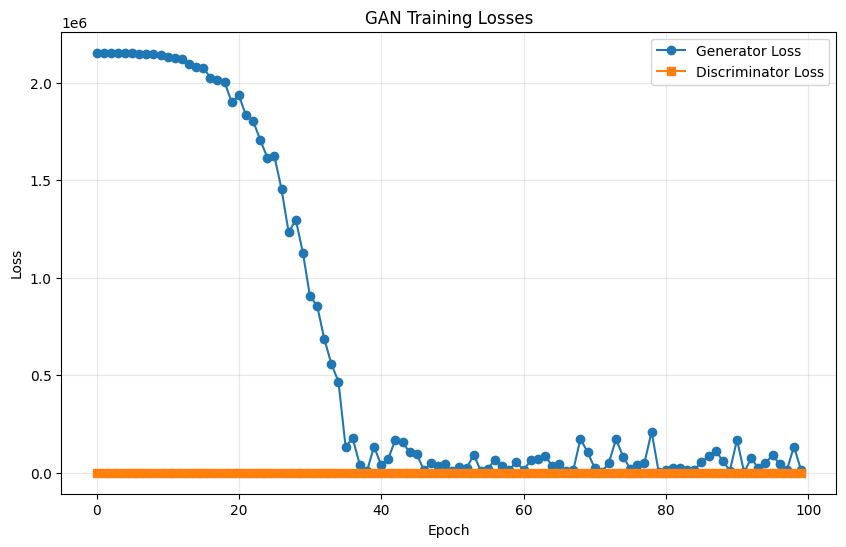

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Предполагаем df уже существует с колонками 'Epoch', 'Generator Loss', 'Discriminator Loss'
plt.figure(figsize=(10, 6))
plt.plot(df_losses['Epoch'], df_losses['Generator Loss'], label='Generator Loss', marker='o')
plt.plot(df_losses['Epoch'], df_losses['Discriminator Loss'], label='Discriminator Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GAN Training Losses')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### CTAB-GAN-PLUS

In [1]:
from tab_forge.models import CTABGANPlusSynthesizer

[KeOps] Warning : CUDA libraries not found or could not be loaded; Switching to CPU only.


In [2]:
model = CTABGANPlusSynthesizer(epochs=10, batch_size=64)

In [3]:
model.get_hyperparameters()

{'epochs': 10,
 'batch_size': 64,
 'lr': 0.0002,
 'random_dim': 128,
 'critic_iterations': 3,
 'class_dim': [256, 256],
 'l2scale': 0.0001}

In [4]:
from sklearn.datasets import make_regression
import pandas as pd

X, y = make_regression(n_samples=256, n_features=5, n_informative=3, noise=0.1, random_state=42)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(5)])
df['target'] = y
print(df.head())

   feature_0  feature_1  feature_2  feature_3  feature_4      target
0  -0.692905  -0.294950  -1.243863   0.894924  -0.718407 -129.286947
1   0.018434  -0.778305  -0.183983  -0.539760   0.347582   26.333881
2   0.822060  -0.753736   0.412781  -0.245388   1.896793  221.567006
3   1.632411   0.130741  -1.247783  -0.440044  -1.430141    7.030174
4  -1.026515   1.195047   1.073632  -0.700121   0.132970  -60.653914


In [5]:
model.fit(
    data=df,
    cat_columns=[],
    num_columns=['feature_0',  'feature_1',  'feature_2',  'feature_3',  'feature_4'],
    type_task={'Regression': "target"})

c:\Users\user\miniforge3\envs\nir_venv_py3_11\Lib\site-packages\sklearn\mixture\_base.py:275: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\user\miniforge3\envs\nir_venv_py3_11\Lib\site-packages\sklearn\mixture\_base.py:275: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\user\miniforge3\envs\nir_venv_py3_11\Lib\site-packages\sklearn\mixture\_base.py:275: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\user\miniforge3\envs\nir_venv_py3_11\Lib\site-packages\sklearn\mixture\_base.py:275: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or

In [6]:
model.generate(10)

,feature_0,feature_1,feature_2,feature_3,feature_4,target
0,0.510491,0.388620,0.547861,1.020925,-0.849051,80.835105
1,-0.735990,0.421810,-0.091528,-0.099084,-0.813440,58.472958
2,-0.850881,-0.518594,-0.129815,-0.144067,-0.131524,-99.163392
3,-0.974383,-0.860158,0.598535,0.496026,-0.627668,-105.913339
4,-0.867640,-0.783317,-0.291839,1.389691,0.498202,-86.788966
5,-0.799660,0.683322,0.145453,0.713692,1.006758,-51.670622
6,0.599113,-0.630297,-0.179595,0.098330,0.154849,71.172453
7,-0.491564,-0.579237,0.588347,0.890889,0.866805,-120.895962
8,-0.827412,-0.186931,-0.014987,-0.484507,0.166342,-74.449040
9,0.414197,0.544471,0.054416,-0.904199,-1.124962,-71.621463


In [7]:
df_losses = model.get_losses()

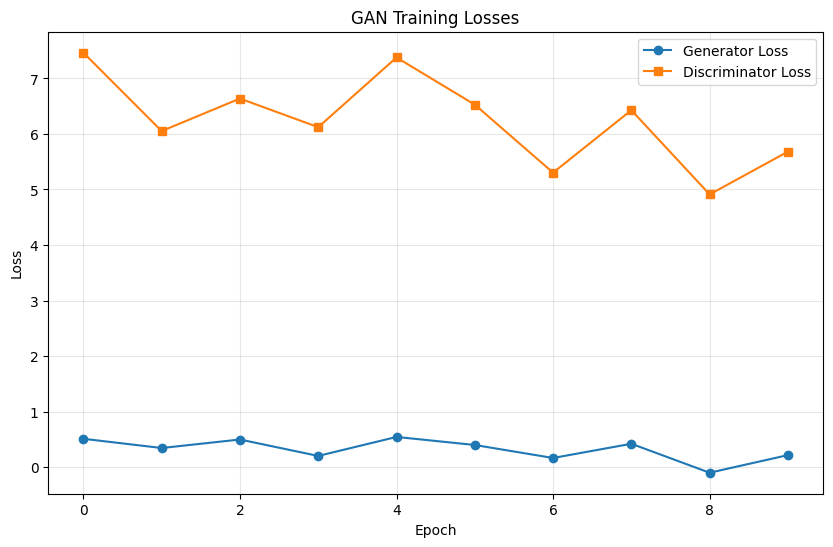

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Предполагаем df уже существует с колонками 'Epoch', 'Generator Loss', 'Discriminator Loss'
plt.figure(figsize=(10, 6))
plt.plot(df_losses['Epoch'], df_losses['Generator Loss'], label='Generator Loss', marker='o')
plt.plot(df_losses['Epoch'], df_losses['Discriminator Loss'], label='Discriminator Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GAN Training Losses')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
